# Temperature anomalies

Temperature anomalies are defined as the difference between a temperature with respect to a reference temperature. For instance, we could take todays temperature and subtract the average temperature of the last week and the result would be the temperature anomaly for today. 

In practice, temperature anomalies are calculated to see long-term trends, and consequently, the reference temperature is usually the average temperature of a long period of time in the past. In the present Jupyter notebook, we seek to plot the temperature anomalies for the month of June 2021.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature


plt.style.use('dark_background')

## The data
Fortunately for us, NASA's Goddard Institute for Space Studies provides a tool, the [GISS Surface Temperature Analysis (v4)](https://data.giss.nasa.gov/gistemp/maps/), that allows us to obtain the temperature anomalies for almost the entire world as *.txt* files. It also allows us to choose a base period (from which the reference temperature is calculated). For this project, we left this period as its default (all Junes from 1951 to 1980). Here we load the data into a DataFrame and modify it to make it useful.

In [2]:
data_file = './data/january2022anomalies.txt'
df = pd.read_csv(data_file, sep='\t', skiprows=1)
df

,"i j lon lat array(i,j)"
0,1 1 -179.00 -89.00 -0.0289
1,2 1 -177.00 -89.00 -0.0289
2,3 1 -175.00 -89.00 -0.0289
3,4 1 -173.00 -89.00 -0.0289
4,5 1 -171.00 -89.00 -0.0289
...,...
16195,176 90 171.00 89.00 3.8070
16196,177 90 173.00 89.00 3.8070
16197,178 90 175.00 89.00 3.8070
16198,179 90 177.00 89.00 3.8070


In [3]:
def separateint(element, index):
    return int(element.split()[index])

def separatefloat(element, index):
    return float(element.split()[index])

df['i'] = df[df.columns[0]].apply(separateint, index=0)
df['j'] = df[df.columns[0]].apply(separateint, index=1)
df['lon'] = df[df.columns[0]].apply(separatefloat, index=2)
df['lat'] = df[df.columns[0]].apply(separatefloat, index=3)
df['temp'] = df[df.columns[0]].apply(separatefloat, index=4)
df = df[['i', 'j', 'lon', 'lat', 'temp']]

df

,i,j,lon,lat,temp
0,1,1,-179.0,-89.0,-0.0289
1,2,1,-177.0,-89.0,-0.0289
2,3,1,-175.0,-89.0,-0.0289
3,4,1,-173.0,-89.0,-0.0289
4,5,1,-171.0,-89.0,-0.0289
...,...,...,...,...,...
16195,176,90,171.0,89.0,3.8070
16196,177,90,173.0,89.0,3.8070
16197,178,90,175.0,89.0,3.8070
16198,179,90,177.0,89.0,3.8070


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16200 entries, 0 to 16199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   i       16200 non-null  int64  
 1   j       16200 non-null  int64  
 2   lon     16200 non-null  float64
 3   lat     16200 non-null  float64
 4   temp    16200 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 632.9 KB


## First plot
Using *cartopy*, we try making a contour plot to check the temperature anomalies. However, there seems to be a problem.

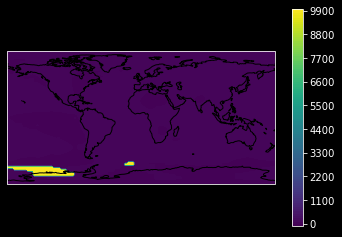

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.contourf(df['lon'].values.reshape((90,180)), 
             df['lat'].values.reshape((90,180)), 
             df['temp'].values.reshape((90,180)), 120,
             transform=ccrs.PlateCarree())
ax.coastlines()
plt.colorbar()
plt.show()

## Further cleaning of the data
As we can see thanks to the colorbar, there certainly are errors in the temperature anomalies (a temperature anomaly of 9900 is completely unreal). Thus, we further inspect the data, and chose to replace these wrong values with *np.nan*. We try plotting again.

In [6]:
df['temp'].value_counts().sort_index()

-2.6929         2
-2.6894         2
-2.6861         1
-2.6850         1
-2.6482         1
             ... 
 6.7042         1
 6.7270         4
 6.7693         4
 6.7834         4
 9999.0000    174
Name: temp, Length: 10019, dtype: int64

In [7]:
def replacewrongtemps(element):
    if element > 20.0:
        return np.nan
    else:
        return element
    
df['temp_clean'] = df['temp'].apply(replacewrongtemps)

In [8]:
df['temp'].value_counts().sort_index()

-2.6929         2
-2.6894         2
-2.6861         1
-2.6850         1
-2.6482         1
             ... 
 6.7042         1
 6.7270         4
 6.7693         4
 6.7834         4
 9999.0000    174
Name: temp, Length: 10019, dtype: int64

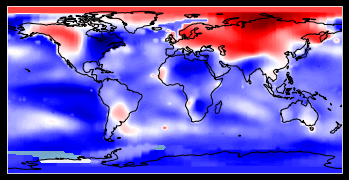

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
plt.contourf(df['lon'].values.reshape((90,180)), 
             df['lat'].values.reshape((90,180)), 
             df['temp_clean'].values.reshape((90,180)), 150,
             transform=ccrs.PlateCarree(), cmap=plt.cm.seismic)
ax.coastlines()
plt.show()

## Final plot
This seems more reasonable. Now, we make a fancier plot for a wider audience.
**IMPORTANT:** The saved graph has to be cropped before sharing.

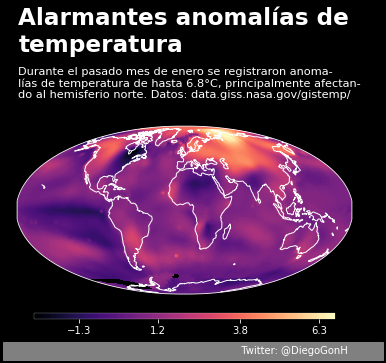

In [11]:
fig = plt.figure(figsize=[6, 7])
ax = plt.subplot(1, 1, 1, projection=ccrs.Mollweide())
# ax2 = plt.subplot(1, 2, 2)


for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)

ax.tick_params(bottom=False, left=False)

# change the color of the axes' tick labels
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')

# set the ticks and labels
ax.set_xticks([])
ax.set_xticklabels([])

ax.set_yticks([])
ax.set_yticklabels([])
    
# the plot
pcm = plt.contourf(df['lon'].values.reshape((90,180)), 
                   df['lat'].values.reshape((90,180)), 
                   df['temp_clean'].values.reshape((90,180)), 150,
                   transform=ccrs.PlateCarree(), cmap=plt.cm.magma)
ax.add_feature(cfeature.COASTLINE, edgecolor='white')

cb = fig.colorbar(pcm, ax=[ax], location='bottom', aspect=50, pad=0.05, shrink=0.9,
                  ticks=np.round(np.linspace(-3.8, 6.3, 5),1))
#cb.outline.set_visible(False)
cb.outline.set_linewidth(0.2)

# texts
ax.text(-1.78e7, 1.7e7, s='Alarmantes anomalías de \ntemperatura', size=23.1, weight='bold')
subtitle = 'Durante el pasado mes de enero se registraron anoma- \nlías de temperatura de hasta 6.8°C, principalmente afectan- \ndo al hemisferio norte. Datos: data.giss.nasa.gov/gistemp/' 
ax.text(-1.78e7, 1.2e7, s=subtitle, size=11.3)

# add authorship
ax.text(-1.9e7, -1.54e7, ' ' * 75 + 'Twitter: @DiegoGonH' + ' '*10,
                color='white',
                backgroundcolor='grey')


plt.savefig('anomalias_temp_enero2022.jpg', dpi=128)

plt.show()
    